# Módulo 10 tarefa 03
Considere a mesma base de dados utilizada na tarefa 1 ```previsao_de_renda.csv```.

1) Construa um gráfico de barras para avaliar a distribuição das variáveis qualitativas no tempo. Você acha que houve alguma alteração importante a ser investigada?

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
previsao_raw = pd.read_csv('previsao_de_renda.csv')

In [3]:
previsao_raw.head()

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


In [4]:
previsao_veiculo = previsao_raw[['data_ref', 'posse_de_veiculo']].copy()

In [5]:
previsao_imovel = previsao_raw[['data_ref', 'posse_de_imovel']].copy()

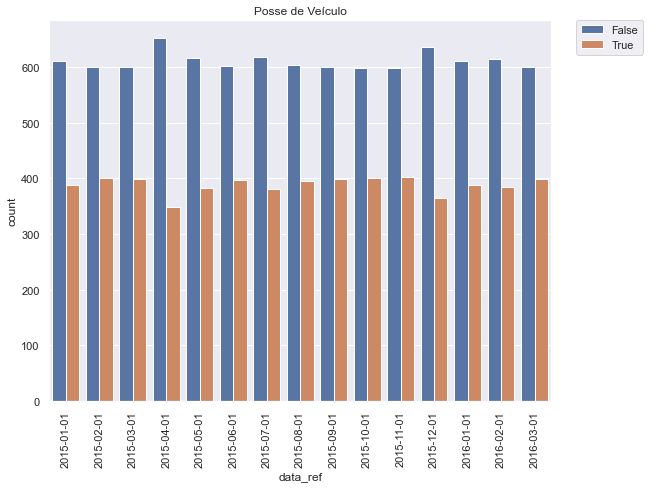

In [6]:
sns.set(rc={'figure.figsize':(9,7)})
ax = sns.countplot(x='data_ref',  hue = 'posse_de_veiculo', data=previsao_veiculo)

tick_labs = previsao_veiculo['data_ref'].unique()

# tick_labs.tolist()

ticks = ax.set_xticks(list(range(previsao_veiculo['data_ref'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=90)
title = ax.set_title('Posse de Veículo')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

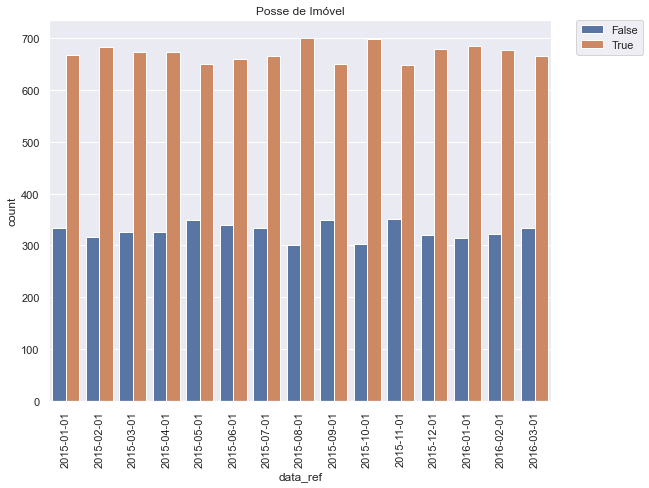

In [7]:
sns.set(rc={'figure.figsize':(9,7)})
ax = sns.countplot(x='data_ref',  hue = 'posse_de_imovel', data=previsao_imovel)

tick_labs = previsao_imovel['data_ref'].unique()

# tick_labs.tolist()

ticks = ax.set_xticks(list(range(previsao_imovel['data_ref'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=90)
title = ax.set_title('Posse de Imóvel')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#### Variáveis qualitativas no tempo

No período amostral não é possível perceber nenhuma alteração significativa no perfil das variáveis 'posse de veículo' e 'posse de imóvel'. Para ambas, a proporção entre quem possui ou não cada um dos bens se mantem estável ao longo do tempo.

2) Para cada variável qualitativa, construa um gráfico mostrando as médias de cada nível da variável no tempo e avalie a estabilidade. Houve alguma alteração importante? Você acha que se pode utilizar essas variáveis em uma modelagem?

In [11]:
previsao_veiculo2 = previsao_raw[['data_ref', 'posse_de_veiculo', 'tempo_emprego', 'renda']].copy()

In [12]:
previsao_veiculo2.head()

,data_ref,posse_de_veiculo,tempo_emprego,renda
0,2015-01-01,False,3.575342,3369.24
1,2015-01-01,True,0.860274,6096.14
2,2015-01-01,True,8.065753,5658.98
3,2015-01-01,True,1.208219,7246.69
4,2015-01-01,False,13.873973,4017.37


In [18]:
veiculo_tempo_true = previsao_veiculo2[previsao_veiculo2['posse_de_veiculo'] == True].groupby('data_ref')['tempo_emprego'].mean()

In [20]:
veiculo_tempo_false = previsao_veiculo2[previsao_veiculo2['posse_de_veiculo'] == False].groupby('data_ref')['tempo_emprego'].mean()

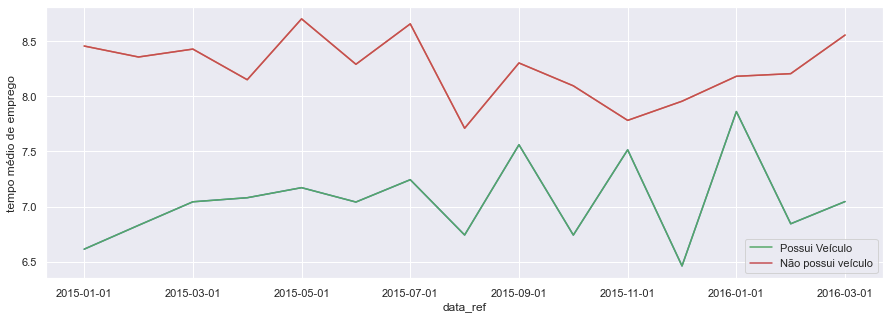

In [23]:
veiculo_tempo_true.plot(figsize=[15,5])
veiculo_tempo_false.plot()
line1, = plt.plot(veiculo_tempo_true)
line2, = plt.plot(veiculo_tempo_false)
plt.ylabel('tempo médio de emprego')
plt.legend([line1, line2], ['Possui Veículo', 'Não possui veículo']);

In [24]:
veiculo_renda_true = previsao_veiculo2[previsao_veiculo2['posse_de_veiculo'] == True].groupby('data_ref')['renda'].mean()

In [25]:
veiculo_renda_false = previsao_veiculo2[previsao_veiculo2['posse_de_veiculo'] == False].groupby('data_ref')['renda'].mean()

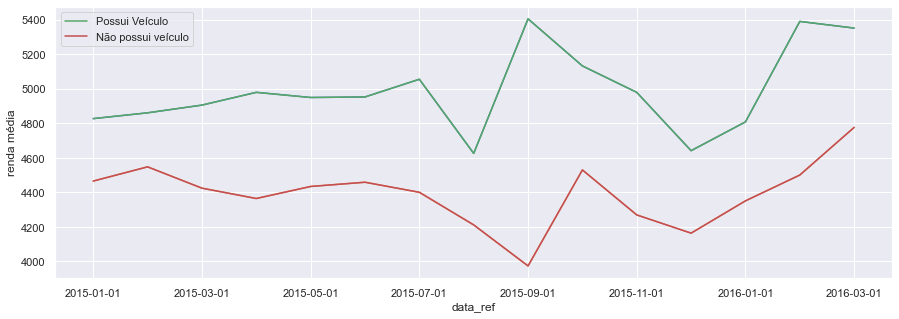

In [26]:
veiculo_renda_true.plot(figsize=[15,5])
veiculo_renda_false.plot()
line1, = plt.plot(veiculo_renda_true)
line2, = plt.plot(veiculo_renda_false)
plt.ylabel('renda média')
plt.legend([line1, line2], ['Possui Veículo', 'Não possui veículo']);

#### Níveis das variáveis para qualitativa 'posse_de_veiculo'

As médias de 'tempo_de_emprego' ao longo do tempo varia de forma significativa e não mostra qualquer simetria entre os que possuem e não possuem veículo.
As médias de 'renda' também variam de forma significativa ao longo do tempo, mas entre os que possuem e não possuem veículo, mostram certa simetria na flutuação: os viés de alta e baixa seguem de forma semelhante.
Outra leitura que pode ser feita é que a média da renda dos que possuem veículo é sempre superior aos que não possuem veículo.

In [27]:
previsao_imovel2 = previsao_raw[['data_ref', 'posse_de_imovel', 'tempo_emprego', 'renda']].copy()

In [28]:
previsao_imovel2.head()

,data_ref,posse_de_imovel,tempo_emprego,renda
0,2015-01-01,True,3.575342,3369.24
1,2015-01-01,True,0.860274,6096.14
2,2015-01-01,True,8.065753,5658.98
3,2015-01-01,False,1.208219,7246.69
4,2015-01-01,False,13.873973,4017.37


In [29]:
imovel_tempo_true = previsao_imovel2[previsao_imovel2['posse_de_imovel'] == True].groupby('data_ref')['tempo_emprego'].mean()

In [30]:
imovel_tempo_false = previsao_imovel2[previsao_imovel2['posse_de_imovel'] == False].groupby('data_ref')['tempo_emprego'].mean()

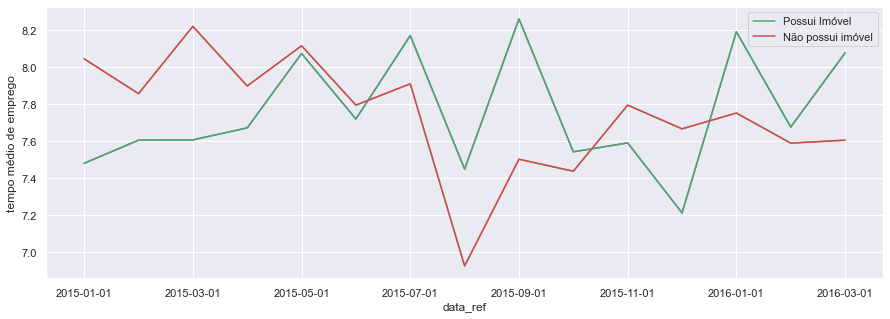

In [31]:
imovel_tempo_true.plot(figsize=[15,5])
imovel_tempo_false.plot()
line1, = plt.plot(imovel_tempo_true)
line2, = plt.plot(imovel_tempo_false)
plt.ylabel('tempo médio de emprego')
plt.legend([line1, line2], ['Possui Imóvel', 'Não possui imóvel']);

In [32]:
imovel_renda_true = previsao_imovel2[previsao_imovel2['posse_de_imovel'] == True].groupby('data_ref')['renda'].mean()

In [33]:
imovel_renda_false = previsao_imovel2[previsao_imovel2['posse_de_imovel'] == False].groupby('data_ref')['renda'].mean()

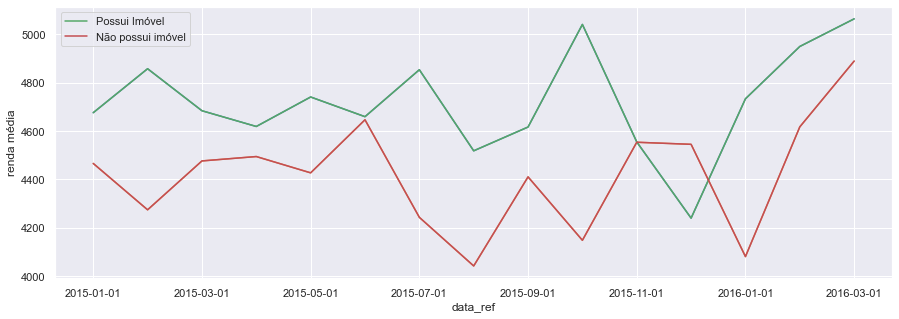

In [34]:
imovel_renda_true.plot(figsize=[15,5])
imovel_renda_false.plot()
line1, = plt.plot(imovel_renda_true)
line2, = plt.plot(imovel_renda_false)
plt.ylabel('renda média')
plt.legend([line1, line2], ['Possui Imóvel', 'Não possui imóvel']);

#### Níveis das variáveis para a qualitativa 'posse_de_imovel'

Já na evolução temporal das variáveis 'renda' e 'tempo_de_emprego', a fluatação é bastante considerável e não mostra qualquer tipo de correção entre os que possuem e não possuem imóvel, embora possa ser obsrevado que a média dos que possuem imóvel em quase todo período amostral é superior aos que não possuem imóvel.


#### Análise final

As varíaveis 'posse_de_veiculo' e 'renda' isoladamente não oferecem padrões suficientes para construir uma modelagem.
Possivelmente aplicando-se tecnicas mais sofisticadas sobre as duas ao mesmo tempo seja possível chegar numa modelagem.